In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import the backer_info.csv file into a DataFrame.
emission_data=r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\GCB2022v27_MtCO2_flat.csv'
df = pd.read_csv(emission_data)
#display
df.head(10)


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [4]:
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [5]:
df['Country']= df['Country'].astype('str') 
#df['ISO 3166-1 alpha-3 '] = df['ISO 3166-1 alpha-3 '].astype(str)
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [6]:
# selecting rows based on"gloable", use lot method to retrieve the data
df_global = df.loc[(df['Country']=='Global')]
df_global                            

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739280,14506.973810,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830690,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558970,14725.978030,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085730,14174.564010,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


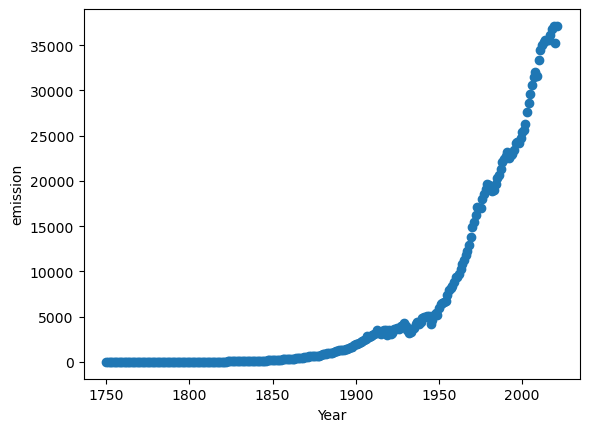

In [7]:
# trend of annual total global emissions
plt.scatter(df_global.Year,df_global.Total)
plt.xlabel('Year')
plt.ylabel('emission')
plt.show()

In [8]:
# save the global dataset
# df_global.to_csv(r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\global.csv')

In [9]:
# selecting the year after 1950
df_global_1950 = df.loc[(df['Country']=='Global')& (df['Year'] >= 1950)]
df_global_1950.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63032,Global,WLD,1950,6003.271922,3856.215025,1648.309543,353.156200,66.978938,73.624416,NaN,2.401960
63033,Global,WLD,1951,6379.796307,4060.039800,1742.354432,416.186336,75.839229,79.875260,NaN,2.508639
63034,Global,WLD,1952,6465.726953,4009.059071,1838.023921,447.085044,80.840562,85.363804,NaN,2.496159
63035,Global,WLD,1953,6647.763209,4043.705068,1952.100332,474.527427,89.627553,81.348030,NaN,2.517826
63036,Global,WLD,1954,6789.968651,4039.512096,2068.542651,501.349623,97.230969,77.612011,NaN,2.522296
63037,Global,WLD,1955,7443.244062,4372.781274,2311.863763,547.229127,107.565749,96.835899,NaN,2.710506
63038,Global,WLD,1956,7924.253363,4597.137216,2508.048188,587.228538,116.624053,108.173769,NaN,2.829077
63039,Global,WLD,1957,8185.546669,4681.797771,2621.266199,646.665818,122.609816,106.385515,NaN,2.864216
63040,Global,WLD,1958,8417.623867,4754.382025,2726.365530,705.824678,129.775386,95.114847,NaN,2.886595
63041,Global,WLD,1959,8856.221171,4948.027578,2904.648763,758.226391,145.336357,91.693532,NaN,2.981599


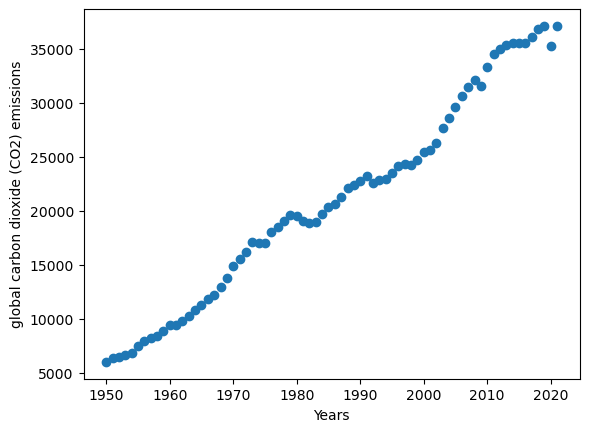

In [10]:
# plot of annual total global emissions after 1950
plt.scatter(df_global_1950.Year	, df_global_1950.Total)
plt.xlabel('Years')
plt.ylabel('global carbon dioxide (CO2) emissions')
plt.show()

In [11]:
#supervised learning regression 
df_global_1950 = df_global_1950.drop('Country', axis=1)
df_global_1950 = df_global_1950.drop('ISO 3166-1 alpha-3', axis=1)
year_df = df_global_1950.Year
X = year_df.values.reshape(-1, 1)
X[:5]
X.shape

(72, 1)

In [12]:
y = df_global_1950.Total
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [13]:
y_pred = model.predict(X)
print(y_pred.shape)

(72,)


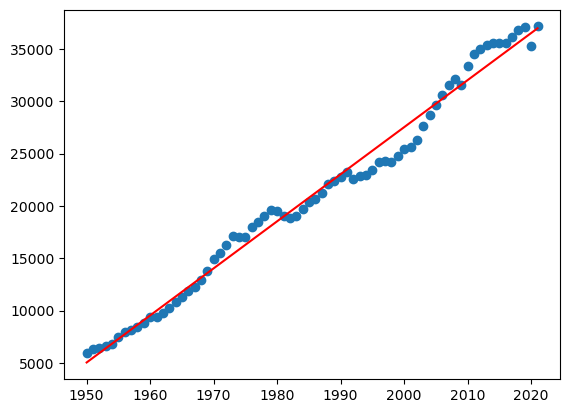

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [15]:
# predict future year ( use the dictionay to save the year and the key value pair)
future_years = [2030, 2040, 2050, 2100]
future_years_pred = dict()
for year in future_years:
    df = pd.DataFrame()
    df['Year'] = [year]
    df = df.values.reshape(-1, 1)
    pred = model.predict(df)
    # print(pred)
    future_years_pred[year] = pred

In [16]:
# summary of future year prediction
print("##### Predicted future results by our model #####\n")
for k,v in future_years_pred.items():
    print("Year %s, predicted emission:%.2f" % (k, v))
    
print("\nAccording to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.")
print("Our model predict that without course change, we will emit %.2fmt of co2 in the year of 2030, far exceeding the target." % (future_years_pred[2030]))

##### Predicted future results by our model #####

Year 2030, predicted emission:40993.90
Year 2040, predicted emission:45486.23
Year 2050, predicted emission:49978.57
Year 2100, predicted emission:72440.26

According to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.
Our model predict that without course change, we will emit 40993.90mt of co2 in the year of 2030, far exceeding the target.
